In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
df1 = pd.read_csv('data.csv')
df = df1.copy()
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.dtypes

f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

In [7]:
df.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.3895505 , -0.91769495,  0.649105  , ...,  0.96048158,
         1.04529612,  0.68332274],
       [-0.6885438 , -0.45919476,  0.65432122, ..., -0.55294213,
         0.3554352 , -1.60267076],
       [ 0.80560694,  0.31875345, -1.16796258, ...,  0.97917134,
        -0.92625017, -2.22432704],
       ...,
       [-0.24988501, -0.46478181,  1.88458578, ...,  1.54422962,
         1.1855134 ,  0.57075203],
       [ 0.30932332,  2.17805293,  0.7613671 , ..., -1.08428749,
        -0.5474945 ,  0.10775421],
       [ 0.75184799,  0.56149   ,  1.45581708, ..., -0.63608329,
         1.00085474, -0.31416284]])

In [9]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(98000, 27)

In [10]:
df_pca

array([[-7.19058135e-01, -1.84284477e-02, -1.01489775e+00, ...,
        -2.83092471e-01, -1.71015243e+00, -2.31225835e-01],
       [-1.01209813e+00, -9.20653984e-01,  1.88684735e+00, ...,
        -2.88820943e-01, -2.54160666e-02,  7.67857388e-01],
       [-1.37061505e+00,  5.85541813e-01, -1.25720259e+00, ...,
        -2.24548162e+00,  1.41960080e+00, -8.17539989e-01],
       ...,
       [ 5.27246160e-01, -6.92976846e-01, -1.41440532e+00, ...,
         1.32667018e+00, -8.50737037e-01, -4.57939378e-01],
       [ 5.87352923e-01, -1.18654312e+00, -1.25014778e-03, ...,
        -2.76966073e-01,  8.49633227e-02, -4.24776376e-01],
       [-1.67504885e+00, -5.86344582e-01,  3.84392187e-02, ...,
        -1.27040866e-01, -1.21862235e-01,  1.42447148e+00]])

In [11]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.719058,-0.018428,-1.014898,-1.852300,0.826982,0.114979,0.576083,-0.833193,1.125217,1.774150,...,0.708038,-0.441667,-0.419596,0.564399,-0.989216,-0.252555,-0.696925,-0.283092,-1.710152,-0.231226
1,-1.012098,-0.920654,1.886847,1.260584,-0.212045,-1.256363,0.162246,-0.116176,-0.307030,1.164314,...,-0.281521,-0.514156,0.529182,0.276327,-1.077501,-0.753800,-1.168344,-0.288821,-0.025416,0.767857
2,-1.370615,0.585542,-1.257203,0.820805,-0.151678,-0.570685,0.676353,-0.316492,1.164202,1.284616,...,-0.007068,0.125229,-2.126750,0.019317,-1.061323,1.433495,1.260143,-2.245482,1.419601,-0.817540
3,1.218932,0.171315,0.230498,1.053605,0.578840,-0.287229,-0.876048,0.081418,-0.350356,-0.760648,...,-0.000508,1.295040,1.347752,0.792693,0.831598,-1.010158,1.031897,-0.185921,-0.304419,0.145491
4,-1.025793,-0.151604,1.437407,2.500153,-0.523530,-0.436372,-2.411039,-0.901765,0.105160,0.014072,...,0.802116,0.415776,-1.944199,0.078684,-0.815831,0.687043,1.144737,0.866386,-0.056802,-0.522505


# Modeling

Cari K optimal menggunakan metode elbow

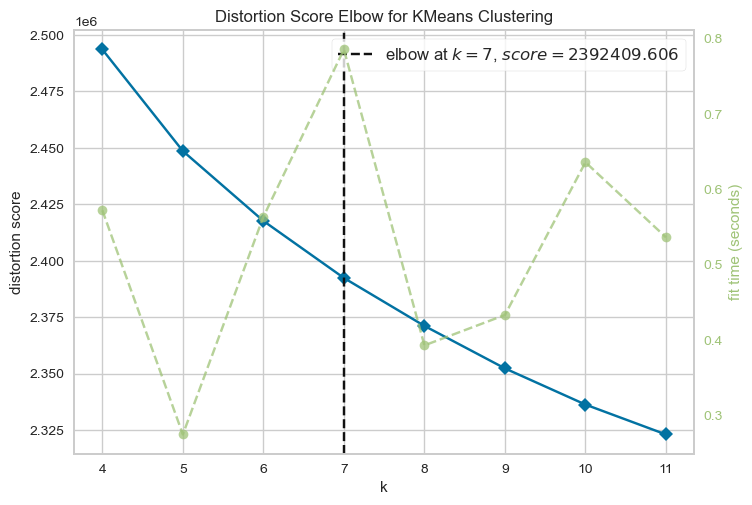

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pca)
visualizer.show()

In [13]:
#KMeans
# km = KMeans(n_clusters=7)
# y = km.fit_predict(df_pca)

In [14]:
#Hierarchical
# hag = AgglomerativeClustering(n_clusters=7)
# y = hag.fit_predict(df_pca)

In [15]:
#GMM
gmm = GaussianMixture(n_components = 7)
y = gmm.fit_predict(df_pca)

In [16]:
y

array([0, 1, 3, ..., 3, 4, 1], dtype=int64)

In [17]:
df1['Predicted']=y

In [18]:
submission=df1.loc[:,['id','Predicted']]
submission.shape

(98000, 2)

In [19]:
submission.head(100)

,id,Predicted
0,0,0
1,1,1
2,2,3
3,3,5
4,4,2
...,...,...
95,95,5
96,96,2
97,97,5
98,98,6


In [20]:
submission.to_csv('submission_gmm_sil.csv',index=False)